In [1]:
import os, shutil
os.environ["KERAS_BACKEND"] = 'plaidml.keras.backend'

from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.models import Sequential, load_model
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import numpy as np

Using plaidml.keras.backend backend.


In [2]:
def build_model(shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=shape, name='conv1'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), name='maxpool1'))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), name='conv2'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), name='maxpool2'))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), name='conv3'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), name='maxpool3'))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), name='conv4'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), name='maxpool4'))
    
    model.add(Flatten())
    
    model.add(Dropout(0.5))
    model.add(Dense(512, name='dense1'))
    model.add(Activation('relu'))
    model.add(Dense(1, name='dense2'))
    model.add(Activation('sigmoid'))
    
    model.compile(optimizer=RMSprop(lr=1e-3),
        loss='binary_crossentropy',
        metrics=['acc'])
    
    return model

In [3]:
def plot_history(hist):
    epochs = [i for i in range(1, len(hist['acc'])+1)]
    fig, axis = plt.subplots(2, 2, figsize=(28, 28))
    index = 0
    for i in range(2):
        for j in range(2):
            key = list(hist.keys())[index]
            axis[i, j].plot(epochs, np.array(hist[key]), 'r-' if index % 2 == 0 else 'b')
            axis[i, j].set_title(key)
            index += 1
    plt.show()

# Data preprocessing

In [4]:
BASE_DIR = '/Users/gabriel/datasets/dogs-vs-cats/'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')

TRAIN_DIR_CLASS = os.path.join(TRAIN_DIR, 'classes')
TRAIN_DOGS_DIR = os.path.join(TRAIN_DIR_CLASS, 'dogs')
TRAIN_CATS_DIR = os.path.join(TRAIN_DIR_CLASS, 'cats')

TEST_DIR = os.path.join(BASE_DIR, 'test')

VALIDATION_DIR = os.path.join(BASE_DIR, 'validation')
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, 'dogs')
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, 'cats')

In [5]:
def create_dirs():
    os.mkdir(TRAIN_DIR_CLASS)
    os.mkdir(TRAIN_DOGS_DIR)
    os.mkdir(TRAIN_CATS_DIR)
    os.mkdir(VALIDATION_DIR)
    os.mkdir(VALIDATION_DOGS_DIR)
    os.mkdir(VALIDATION_CATS_DIR)

In [6]:
create_dirs()

FileExistsError: [Errno 17] File exists: '/Users/gabriel/datasets/dogs-vs-cats/train/classes'

In [7]:
def list_dir_counts():
    print(f"/train/train count: {len(os.listdir(os.path.join(TRAIN_DIR, 'train')))}")
    print(f"/train/classes/cats count: {len(os.listdir(TRAIN_CATS_DIR))}")
    print(f"/train/classes/dogs count: {len(os.listdir(TRAIN_DOGS_DIR))}")
    print(f"/test/test count: {len(os.listdir(os.path.join(TEST_DIR, 'test')))}")
    print(f"/validation/cats count: {len(os.listdir(VALIDATION_CATS_DIR))}")
    print(f"/validation/dogs count: {len(os.listdir(VALIDATION_DOGS_DIR))}")
list_dir_counts()

/train/train count: 25000
/train/classes/cats count: 1000
/train/classes/dogs count: 1000
/test/test count: 12500
/validation/cats count: 500
/validation/dogs count: 500


In [8]:
fnames = [f"cat.{i}.jpg" for i in range(1000)]
for fname in fnames:
    shutil.copyfile(os.path.join(TRAIN_DIR, 'train', fname), os.path.join(TRAIN_CATS_DIR, fname))
    
fnames = [f"dog.{i}.jpg" for i in range(1000)]
for fname in fnames:
    shutil.copyfile(os.path.join(TRAIN_DIR, 'train', fname), os.path.join(TRAIN_DOGS_DIR, fname))
    
fnames = [f"cat.{i}.jpg" for i in range(1000, 1500)]
for fname in fnames:
    shutil.copyfile(os.path.join(TRAIN_DIR, 'train', fname), os.path.join(VALIDATION_CATS_DIR, fname))

fnames = [f"dog.{i}.jpg" for i in range(1000, 1500)]
for fname in fnames:
    shutil.copyfile(os.path.join(TRAIN_DIR, 'train', fname), os.path.join(VALIDATION_DOGS_DIR, fname))

In [9]:
list_dir_counts()

/train/train count: 25000
/train/classes/cats count: 1000
/train/classes/dogs count: 1000
/test/test count: 12500
/validation/cats count: 500
/validation/dogs count: 500


# Model create

In [10]:
IMG_SIZE = 150
BATCH_SIZE = 32
TRAIN_ITEMS_COUNT = len(os.listdir(TRAIN_CATS_DIR)) + len(os.listdir(TRAIN_DOGS_DIR))
VAL_ITEMS_COUNT = len(os.listdir(VALIDATION_CATS_DIR)) + len(os.listdir(VALIDATION_DOGS_DIR))

model = build_model((IMG_SIZE, IMG_SIZE, 3))
model.summary()

INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 36, 36, 64)        0         
__________

# Image generator + augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator

def create_generators():
    train_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                  shear_range=0.2)
    
    val_gen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_gen.flow_from_directory(
        TRAIN_DIR_CLASS, 
        color_mode = 'rgb',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE*2, # because augmentation 
        class_mode='binary')

    validation_generator = val_gen.flow_from_directory(
        VALIDATION_DIR, 
        color_mode = 'rgb',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary')
    return train_generator, validation_generator

## model fit

In [12]:
train_generator, validation_generator = create_generators()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
EPOCHS = 20
history = model.fit_generator(train_generator, epochs=EPOCHS, steps_per_epoch=TRAIN_ITEMS_COUNT // BATCH_SIZE, validation_data=validation_generator, validation_steps=BATCH_SIZE)


Epoch 1/20


INFO:plaidml:Analyzing Ops: 171 of 294 operations complete


62/62 [==============================] - 49s 792ms/step - loss: 0.7784 - acc: 0.5141 - val_loss: 0.6901 - val_acc: 0.5300
Epoch 2/20
62/62 [==============================] - 37s 593ms/step - loss: 0.6908 - acc: 0.5552 - val_loss: 0.6497 - val_acc: 0.6040
Epoch 3/20
62/62 [==============================] - 36s 584ms/step - loss: 0.6676 - acc: 0.5958 - val_loss: 1.0278 - val_acc: 0.5500
Epoch 4/20
62/62 [==============================] - 36s 580ms/step - loss: 0.6399 - acc: 0.6466 - val_loss: 0.6309 - val_acc: 0.6270
Epoch 5/20
62/62 [==============================] - 36s 584ms/step - loss: 0.6397 - acc: 0.6313 - val_loss: 0.5918 - val_acc: 0.6900
Epoch 6/20
62/62 [==============================] - 37s 591ms/step - loss: 0.6118 - acc: 0.6640 - val_loss: 0.6719 - val_acc: 0.6520
Epoch 7/20
62/62 [==============================] - 36s 577ms/step - loss: 0.6166 - acc: 0.6616 - val_loss: 0.5857 - val_acc: 0.6610
Epoch 8/20
62/62 [==============================] - 37s 591ms/step - loss: 0.655

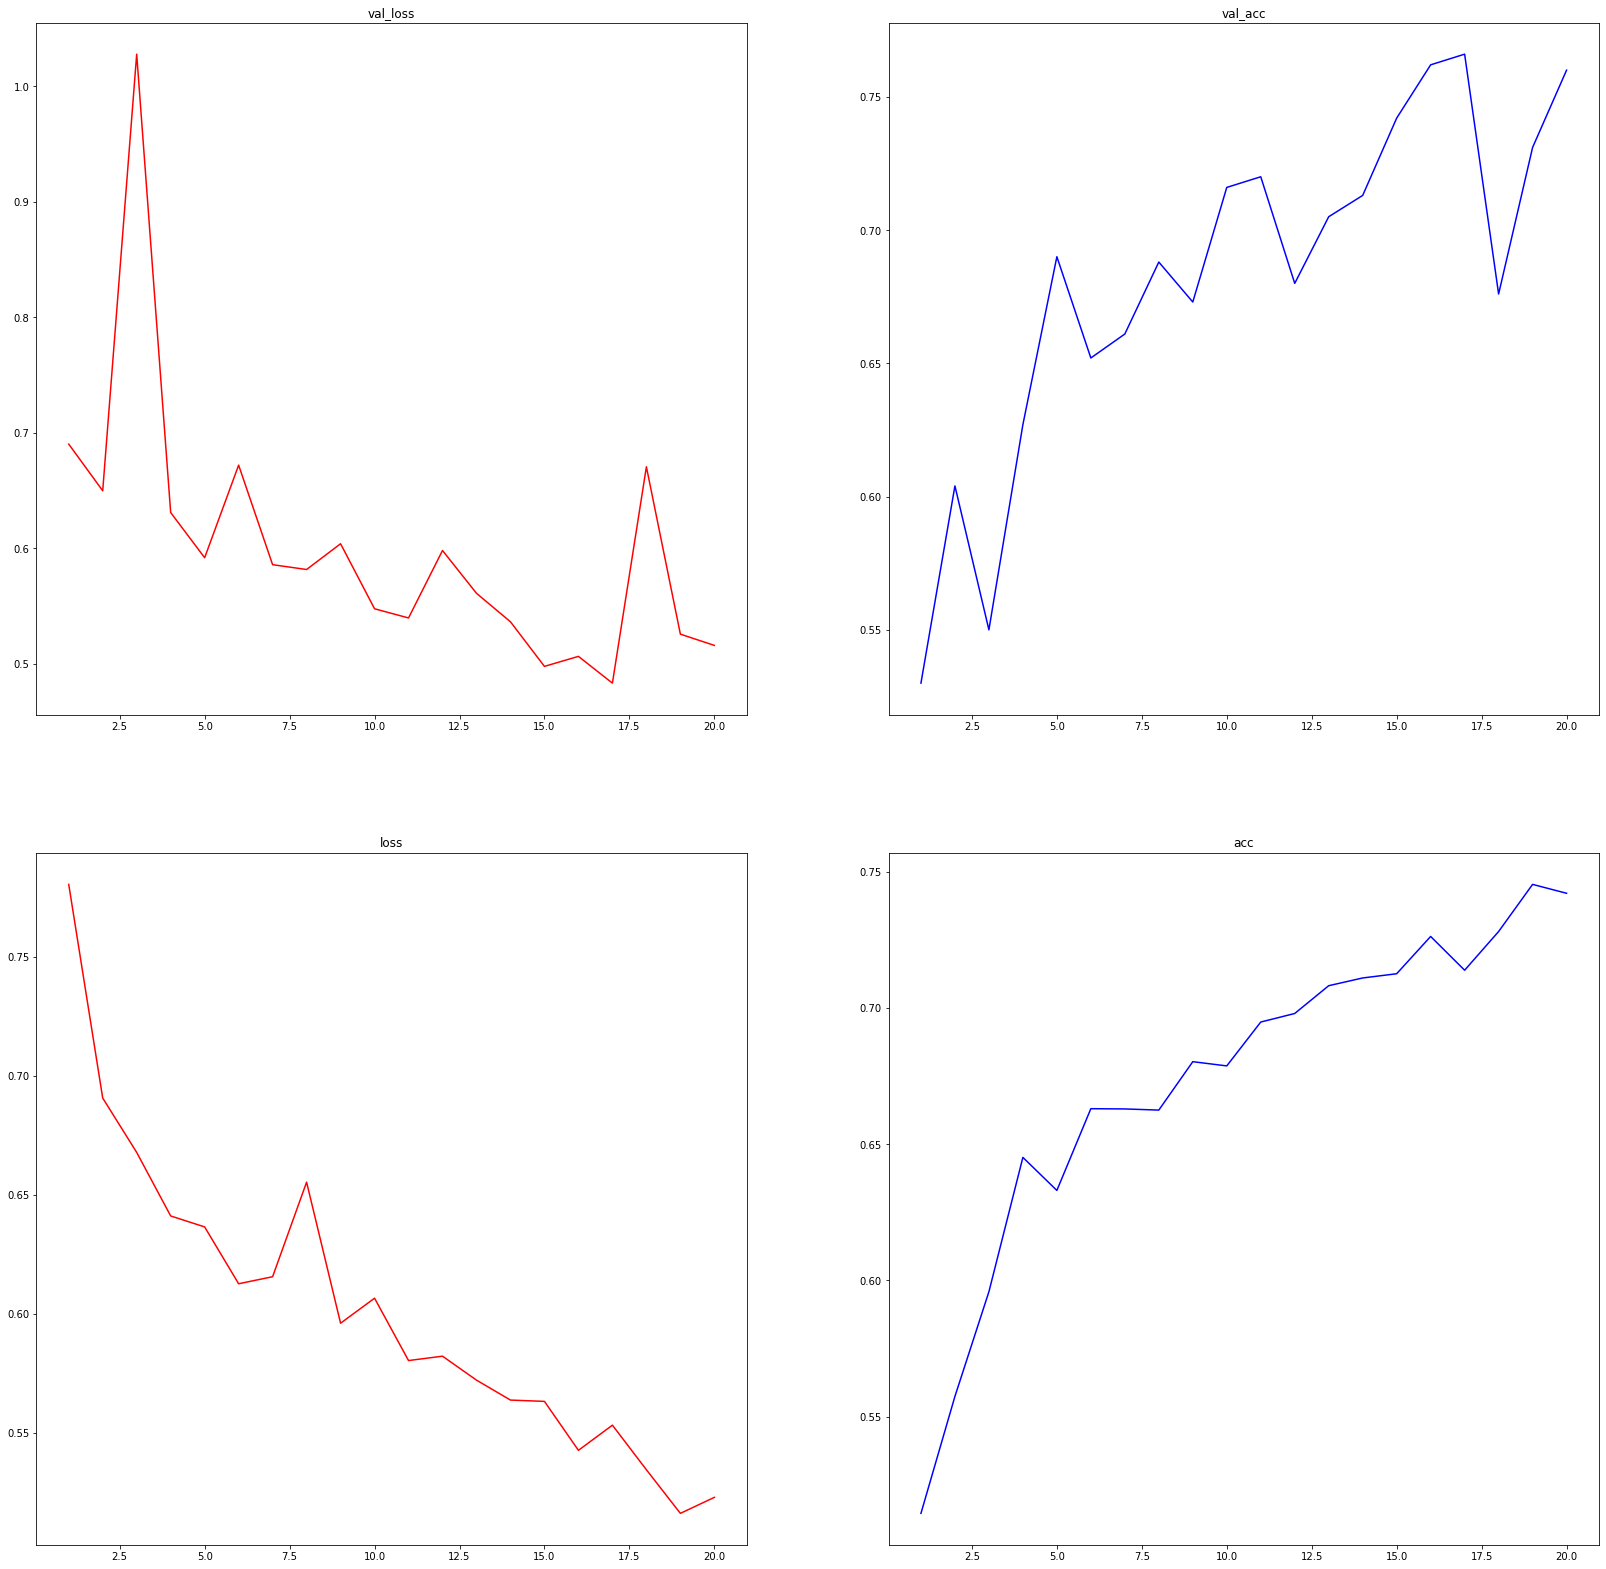

In [14]:
plot_history(history.history)

# Save/load model

In [15]:
MODEL_NAME = 'cnn-model-binclass'
model.save('{}.h5'.format(MODEL_NAME))
model = load_model('{}.h5'.format(MODEL_NAME))

# Predict random images

In [42]:
import cv2
def plot_predicts(model, num_images=4):
    cols = 4
    rows = num_images // cols
    fig, axis = plt.subplots(rows, cols, figsize=(28, 28))
    for i in range(0, rows):
        for j in range(0, cols):
            img = cv2.imread(os.path.join(BASE_DIR, TEST_DIR, 'test', os.listdir(os.path.join(TEST_DIR, 'test'))[np.random.randint(1000)]))
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img.astype(np.float32).reshape(1, IMG_SIZE, IMG_SIZE, -1) / 255.
            predict = float(model.predict(img)[0][0])
            axis[i, j].imshow(img[0])
            axis[i, j].set_title('Cat: {0:2f}%   Dog:{1:2f}%'.format(100. - predict*100, predict*100))
    plt.show()

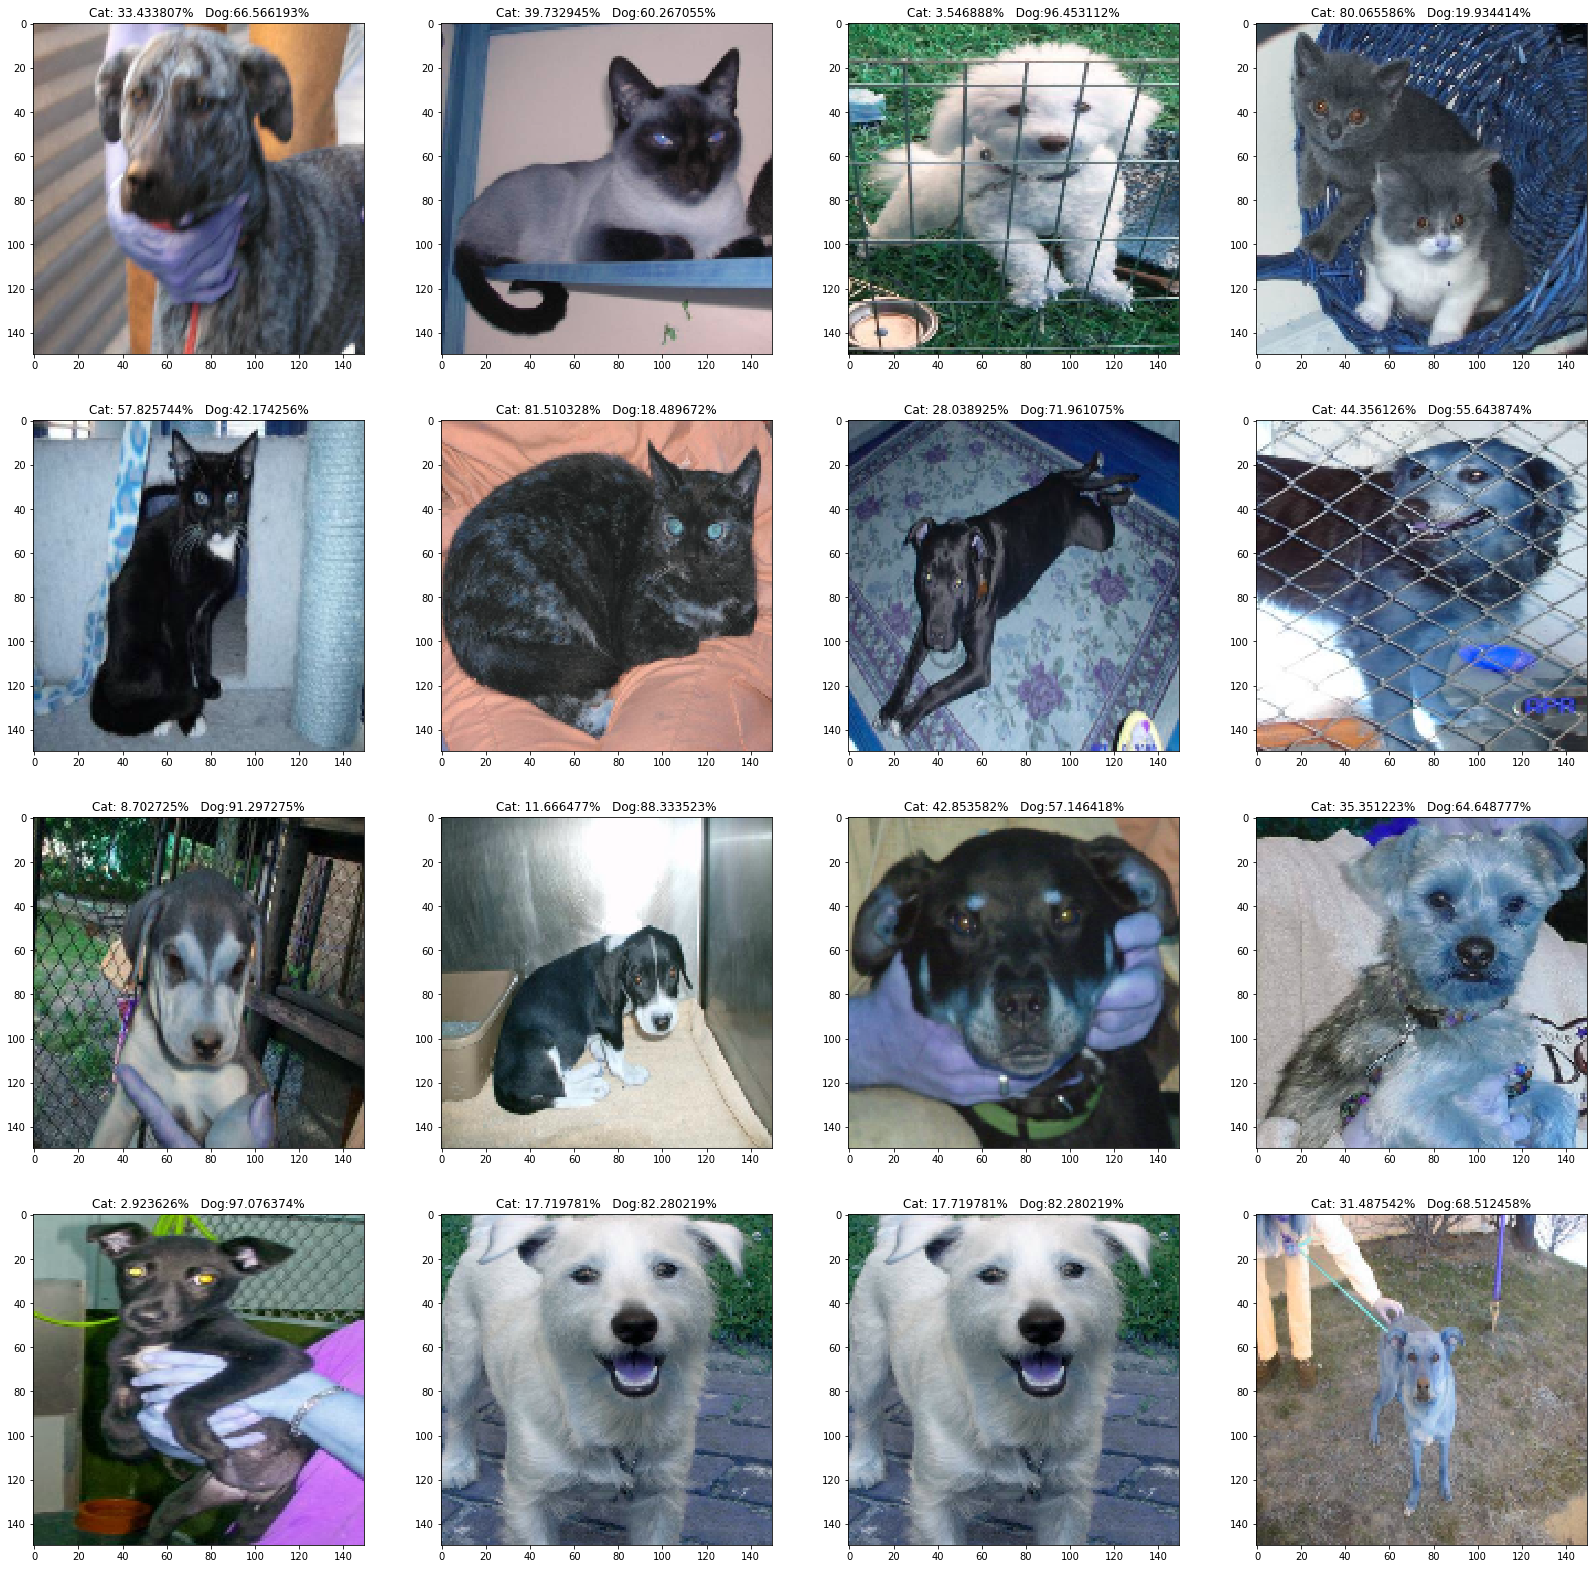

In [43]:
plot_predicts(model, 16)